# Homework 6

Name: Diana Olivas

I collaborated with:

In [83]:
import numpy as np
import matplotlib as mat
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame()

In [84]:
#1. When do we use a multiple-testing correction? Why is it important? [2 points]

In [85]:
#We use multiple-testing correction when we are conducting multiple tests comparing two groups in order to determine the differences between the two groups are statistically significant after a significant omnibus test(preliminary screening to look for sig. diff. among groups before comparisons). This is important because conducting multiple tests which compares two groups leads to an increase in Type I error and we need to keep the error rate at the chosen alpha value.

In [86]:
#2 Which is more “conservative,” meaning it will produce the results with the fewest “significant” findings: the Benjamini-Hochberg correction or the Bonferroni correction?Describe the advantages and disadvantages of using each. [5 points]


In [87]:
#The Bonferroni correction will produce the results with the fewest "significant" findings. A Bonferroni correction adjusts the significance level,⍺ cut-off where the adjusted α is α/m , where m is the number of pairwise (two-group) tests conducted. Type 1 errors are common issues with this method which is lower than the original alpha value. Ultimately, this means that majority will not find any significant differences even if the omnibus test finds a significant difference. In comparision we have the Benjamini-Hochberg correction whcih in this method we find index k, and find a significant difference for the comparisons with the k smallest p-values, and are also able to correct p-values while comparing them to the alpha values and find if they are significant. This method is able to find more significant differences in comparison to the Bonferroni method and allows for more comparison in the data results.

In [88]:
#3 You compare the number of mosquito bites volunteers receive with three different types of insect repellents. There are 30 volunteers in each of the three groups (total of 90). You calculate a p-value that is greater than the ⍺ you pre-selected for this study. How do you interpret this? What further steps should you take to further investigate this issue? [4 points]


In [89]:
#By knowing that the calculated p-value is greater than the pre-selected alpha for this study, we can come to understand that there is no significant difference found. This is due to the p-value not being within a statistically significant threshold. Following, now that we know our issue falls in the need to adjust the alpha level we will be performing the Benjamini-Hochberg method, in order to find the k index and correct the alpha value. This way we can find a significant difference using the k smallest p-values and be more accurate in th interpretation of the data. Thus, we are using multiple testing to fix the issues we were having.

In [90]:
#4 You’re studying the effectiveness of four different fitness regimens for building lower-body strength and you find a statistically significant ANOVA omnibus test. You then conduct pairwise comparisons using re-sampling for each pair of treatments. Your p-values are 0.34 (T1 vs T2), 0.001 (T1 vs T3), 0.0084 (T1 vs T4), 0.003 (T2 vs T3), 0.013 (T2 vs T4), 0.006 (T3 vs T4). Use the Benjamini-Hochberg procedure to determine which treatments are significantly different from each other using ⍺ = 0.01. Use the procedure by hand or with your own code and confirm with Python’s built-in function. [6 points]

In [91]:
pvals=[0.34, 0.001, 0.0084, 0.003, 0.013, 0.006] #p-values from pairwise test

#Benjamini hochberg
import statsmodels.stats.multitest as smm
smm.multipletests(pvals, alpha=0.01, method='fdr_bh')

(array([False,  True, False,  True, False, False]),
 array([0.34  , 0.006 , 0.0126, 0.009 , 0.0156, 0.012 ]),
 0.0016736538523104416,
 0.0016666666666666668)

In [92]:
#5 5. Contrast baths are a common treatment to reduce hand swelling in patients with carpal tunnel syndrome. Researchers randomly assigned individuals to the treatments “Bath”, “Bath+Exercise”, and “Exercise” and measured change in hand volume. This data is provided in the tab-delimited file “contrast-baths.txt” on CCLE and in your Week 6 folder on CoCalc. [Study design and full data set in Janssen et al. 2009 Journal of Hand Therapy - total 27 points]


In [93]:
#a. Visualize the data by group. [2 points]

In [94]:
baths=pd.read_csv('contrast-baths.csv', sep="\t")
baths

,Bath,Bath+Exercise,Exercise
0,5,6,-12
1,10,10,-10
2,-4,0,-7
3,11,14,-1
4,-3,0,-1
5,13,15,0
6,0,4,0
7,2,5,0
8,10,11,0
9,6,7,0


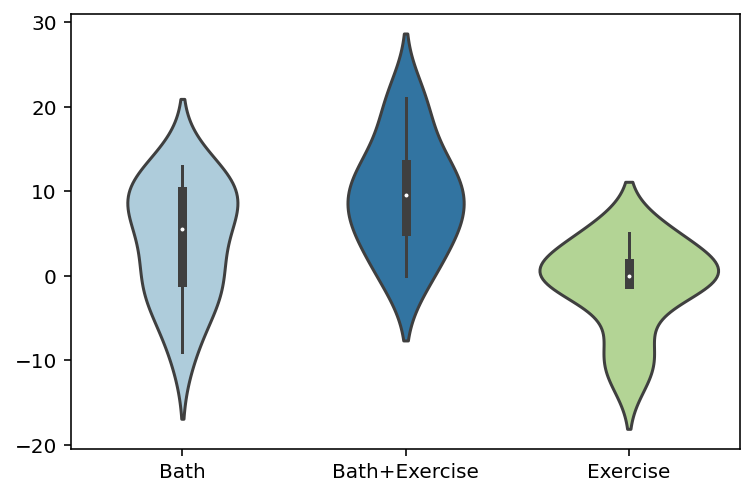

In [95]:
p1=sns.violinplot(data=baths, palette="Paired")

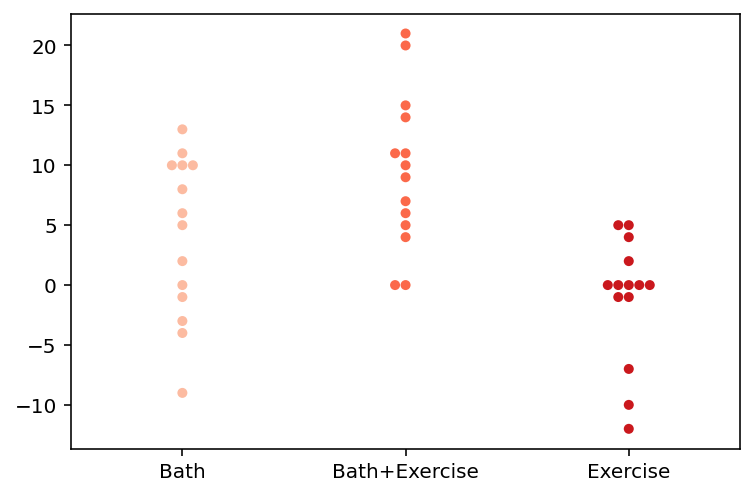

In [96]:
p2=sns.swarmplot(data=baths, palette="Reds")

Text(0.5, 1.0, 'Comparison of hand volume change for contrast baths')

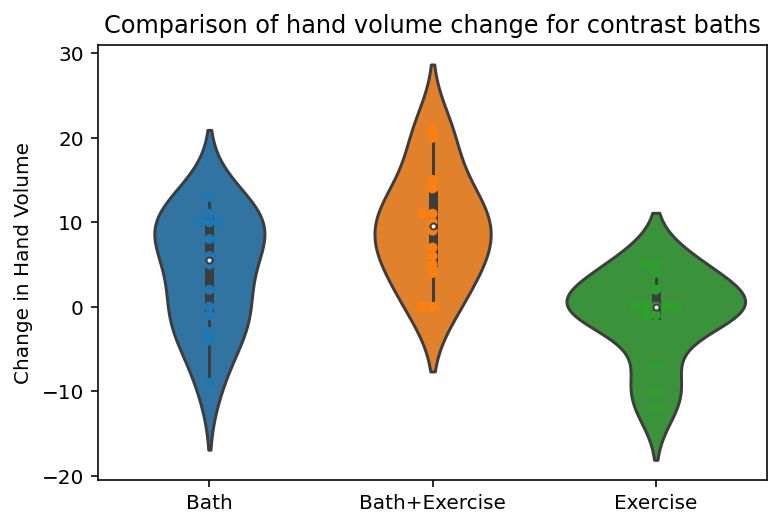

In [97]:
p1 = sns.swarmplot(data=baths) #create beeswarm plot for each
p2 = sns.violinplot(data=baths) #create boxplot for each treatment
p1.set(ylabel="Change in Hand Volume")
p1.set_title("Comparison of hand volume change for contrast baths")

In [98]:
#b State the appropriate measures to describe and compare the groups and calculate their values for the observed data using Python (probably using the function you wrote in Lab 6). Use comments to explain briefly what each line of code does. [4 points]


In [99]:
def MADAM(list):
 med = np.median(list)
 new_list = abs(list - med)
 new_med = np.median(new_list)
 return new_med
MADAM(baths["Bath"]), MADAM(baths["Bath+Exercise"]),MADAM(baths["Exercise"])

(5.0, 4.5, 1.5)

In [100]:
group_median=cb.median()

NameError: name 'cb' is not defined

In [101]:
#The appropriate measure to describe the groups would be with a 99% pivotal confidence interval concerning the median values of the data. The measure to compare the groups would be the  median and grand median, and a big box model using the ranking method. We are using the median due to the lack of bell shaped curves & symmetry. 

In [102]:
#c Describe the appropriate null hypothesis, box model, and sample size for the study. [3 points]

In [103]:
#Null hypothesis:  The null hypothesis would be that the contrast baths remedy has no effect on reducing hand swelling.
#box model: Big box model using rank method (Big box model for omnibus test))
#Sample size:The sample size for the study would be 14

In [104]:
#5d Calculate a p-value for NHST using the appropriate method. Make sure you specify which “box” method you’re using. Include your histogram of simulation results with observed result indicated. Comment on any lines that are different from a standard Big Box method, if any. If you are comparing three or more groups, make sure you determine between which two groups any difference occurs. [6 points]

In [135]:
#compute f statistic 
def computeFlike(df):
 medians = df.median()
 grandMedian = np.median(df)
 var_bt = np.sum(np.abs(medians-grandMedian)*len(df))
 sumabsdev = np.sum(np.abs(df - medians))
 var_within = np.sum(sumabsdev)
 Flike = var_bt/var_within
 return Flike

In [136]:
Fobs = computeFlike(baths)
Fobs

0.75

In [137]:
#recenter the groups
bath_meds = baths.median() #compute column-wise medians
r_baths = baths - bath_meds
np.median(r_baths)


0.0

In [162]:
# Randomly resample from each recentered group
group1 = np.random.choice(r_baths["Bath"],
 len(r_baths["Bath"]))
group2 = np.random.choice(r_baths["Bath+Exercise"],
 len(r_baths["Bath+Exercise"]))
group3 = np.random.choice(r_baths["Exercise"],
 len(r_baths["Exercise"]))
sim_data = pd.DataFrame(np.column_stack((group1, group2, group3)))
sim_data.median()
np.median(sim_data)
# computeFlike(sim_data)

-0.5

In [163]:
flikes = np.zeros(10000)
for i in range(10000): #empty for loop to simulate 10000 times
#Randomly resample from each recentered group
 group1 = np.random.choice(r_baths["Bath"],
 len(r_baths["Bath"]))
 group2 = np.random.choice(r_baths["Bath+Exercise"],
 len(r_baths["Bath+Exercise"]))
 group3 = np.random.choice(r_baths["Exercise"],
 len(r_baths["Exercise"]))
 sim_data = pd.DataFrame(np.column_stack((group1, group2, group3)))
 flikes[i] = computeFlike(sim_data)

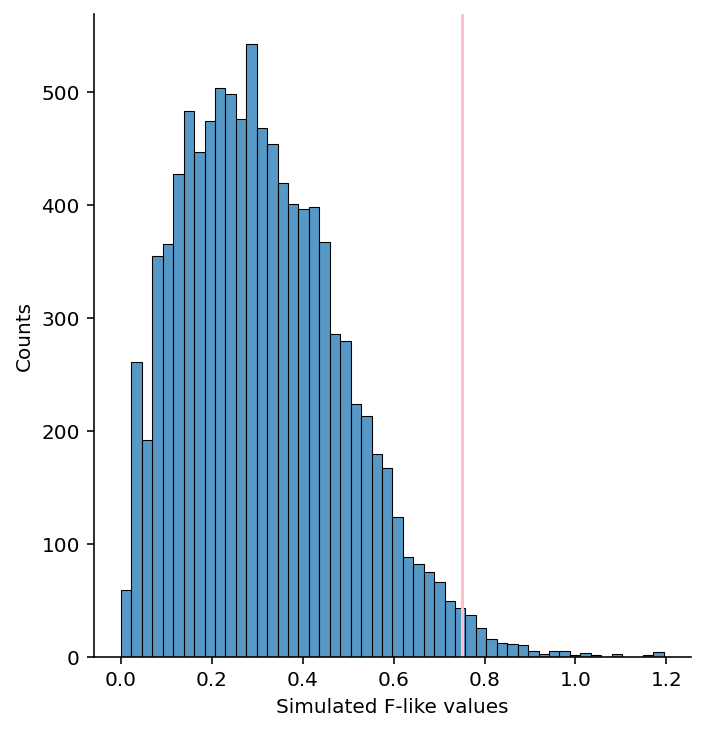

In [164]:
p = sns.displot(flikes, kde = False)
plt.axvline(Fobs, color = "pink")
p.set(xlabel = "Simulated F-like values", ylabel = "Counts")

#plot distribution for f

In [165]:
p_value = np.sum(flikes >= Fobs)/len(flikes)
p_value

0.0155

In [166]:
#Compare two groups using Two-Box Recentered box model
#observed difference in medians
def T_Recen (g_1, g_2):
# Calculate medians, sample sizes, observed difference in medians
 median1 = np.median(g_1)
 median2 = np.median(g_2)
 diffMedObs = median1 - median2
 n1 = len(g_1)
 n2 = len(g_2)

# Recenter two groups by subtracting the group's median
 g1recen = g_1 - median1
 g2recen = g_2 - median2

# Conduct simulations based on the null hypothesis
 B = 10000 # To easily change number of simulations
 sim_diffs = np.zeros(B)
 for i in range(B):
# Randomly select items from each group's recentered data
     p_g1 = np.random.choice(g1recen, n1)
     p_g2 = np.random.choice(g2recen, n2)
     sim_diffs[i] = np.median(p_g1) - np.median(p_g2)
    
#Calculate and store difference in medians for resample
# Plot histogram with results of null simulations
 p = sns.displot(sim_diffs, kde = False)
 p.set(xlabel = "Differences of Median", ylabel = "Count",
 title = "Null Simulations for Comparison of Two Groups \
 with Recentered Two Box Method")
 plt.axvline(diffMedObs, color = "pink")
 plt.axvline(-diffMedObs, color ="pink")

# Calculate & return p-value
 absMobs = np.abs(diffMedObs)

 p_value = (np.sum(sim_diffs <= -absMobs) + np.sum(sim_diffs >= absMobs))/B
 print ("The difference in medians is",diffMedObs)
 print ("The p-value is",p_value)

 return p_value


The difference in medians is -4.0
The p-value is 0.3203


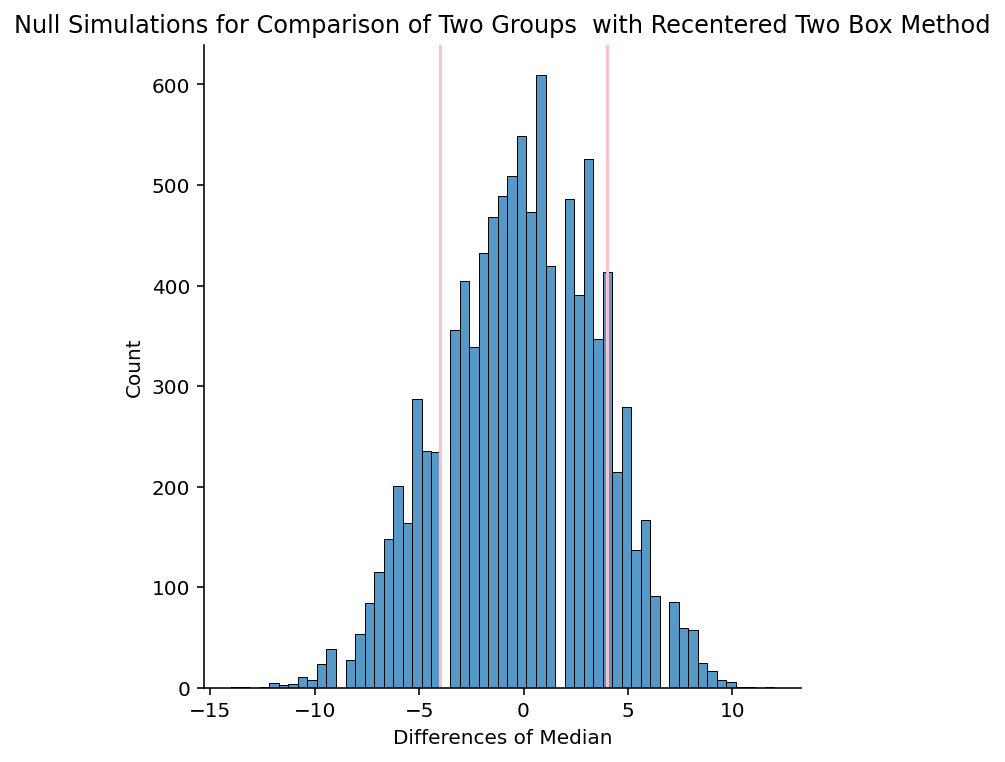

In [167]:

#Big Box or re-centered Two-Box
pBvsBE = T_Recen(baths["Bath"],baths["Bath+Exercise"])


The difference in medians is 5.5
The p-value is 0.0947


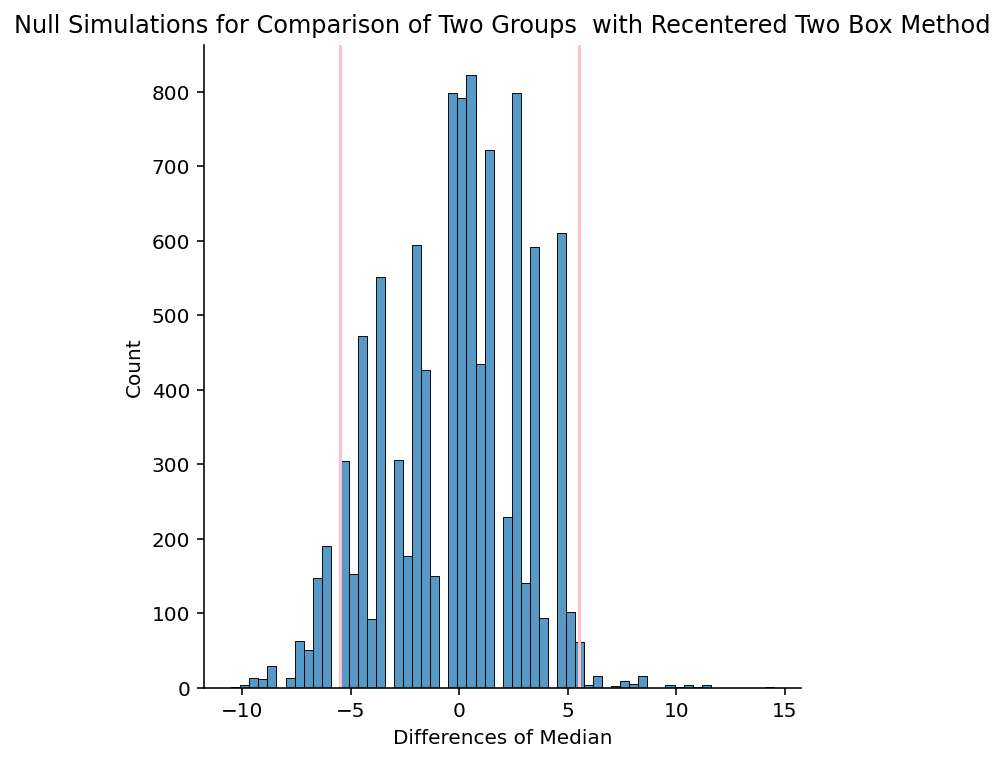

In [168]:
pBvsE = T_Recen(baths["Bath"],baths["Exercise"])

The difference in medians is 9.5
The p-value is 0.0011


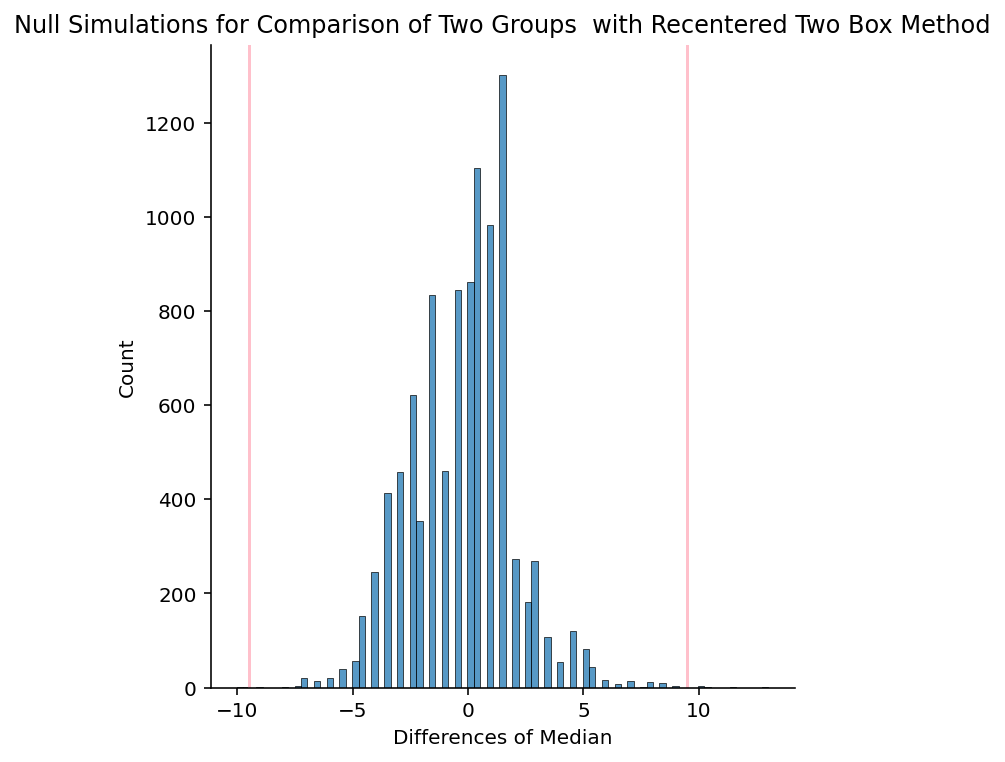

In [169]:
# Compare Bath+Exercise and Exercise
pBEvsE = T_Recen(baths["Bath+Exercise"], baths["Exercise"])

In [170]:

import statsmodels.stats.multitest as smm
smm.multipletests([pBvsBE,pBvsE,pBEvsE], alpha=0.05, method='fdr_bh')

(array([False, False,  True]),
 array([0.3203 , 0.14205, 0.0033 ]),
 0.016952427508441503,
 0.016666666666666666)

In [171]:
#e Calculate 95% confidence interval for the effect size(s) using the appropriate method. [4 points]


In [172]:
def TwoGroupCI (g_1, g_2):

# Calculate observed difference of medians and sample sizes
 diffMedObs = np.median(g_1) - np.median(g_2)
 n1 = len(g_1)
 n2 = len(g_2)

# Simulate groups based on actual data
 B = 10000 #simulate 10000 times
 sims = np.zeros(B)
 for i in range(B): #random selection for groups
     p_g1 = np.random.choice(g_1, n1)
     p_g2 = np.random.choice(g_2, n2)
     sims[i] = np.median(p_g1) - np.median(p_g2)

# Calculate confidence interval
 sims.sort()
 CIlower = 2*diffMedObs - sims[9749] #lower bound
 CIupper = 2*diffMedObs - sims[249] #upper bound
 print ("The observed difference in medians is",diffMedObs)
 print ("The 99% confidence interval for the difference in \
 medians is",[CIlower,CIupper])
    
# Plot histogram of simulation results with CI and Mobs
 p = sns.displot(sims, kde=False)
 p.set(xlabel = "Differences of Median", ylabel = "Count",
 title = "Simulations for Confidence Interval of Effect \
 Size for 2 Groups")
 plt.axvline(CIlower, color="purple")
 plt.axvline(CIupper, color="purple")
 plt.axvline(diffMedObs, color = "pink")

 return [CIlower,CIupper]

The observed difference in medians is -4.0
The 99% confidence interval for the difference in  medians is [-11.0, 3.0]


[-11.0, 3.0]

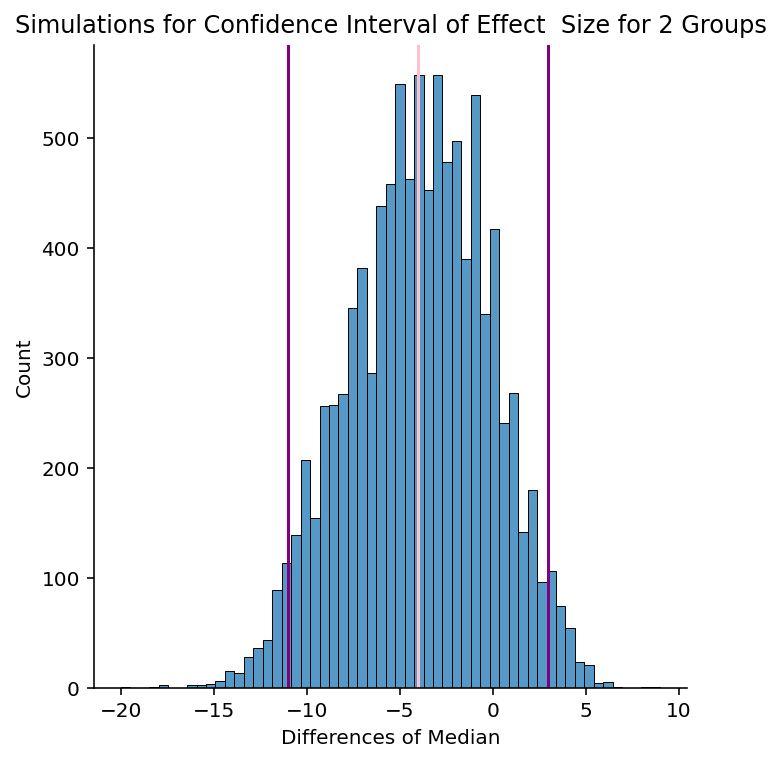

In [173]:
# Compare Bath and Bath+Exercise
TwoGroupCI(baths["Bath"],baths["Bath+Exercise"])

The observed difference in medians is -4.0
The 99% confidence interval for the difference in  medians is [-11.0, 3.5]


[-11.0, 3.5]

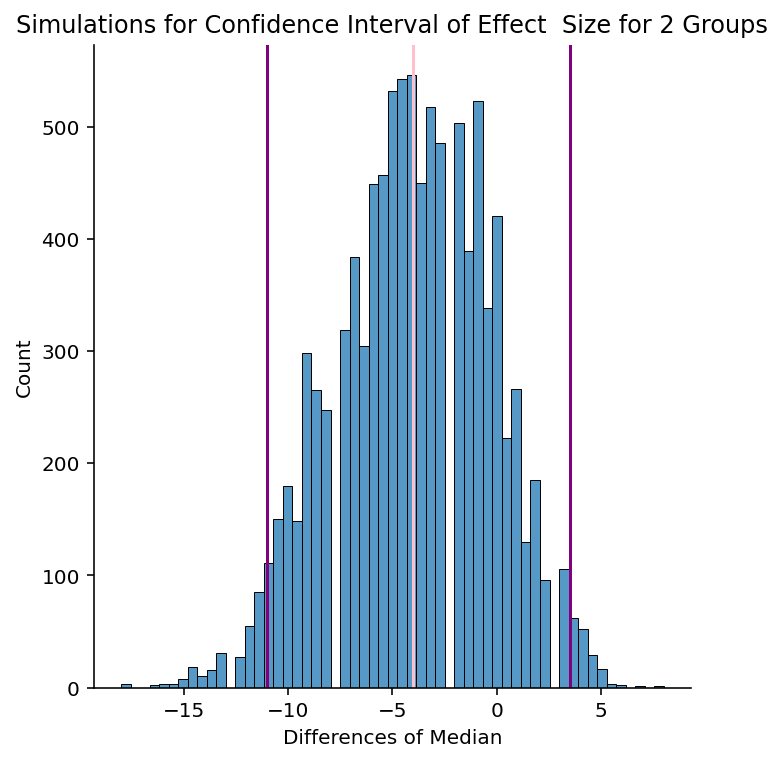

In [174]:
# Compare Bath and Bath+Exercise
TwoGroupCI(baths["Bath"],baths["Bath+Exercise"])

The observed difference in medians is 9.5
The 99% confidence interval for the difference in  medians is [5.0, 14.0]


[5.0, 14.0]

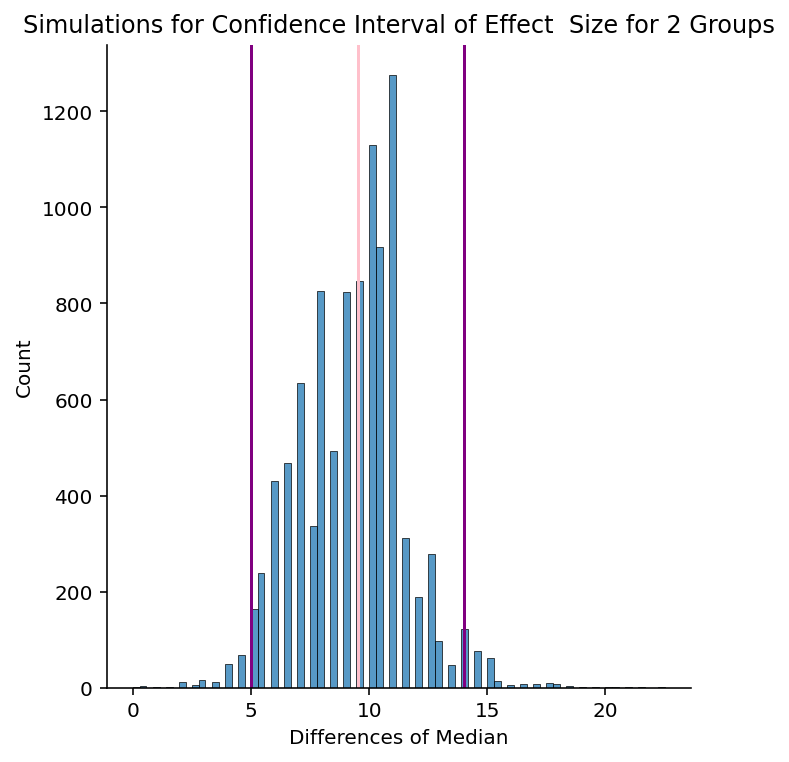

In [175]:
# Compare Bath+Exercise and Exercise
TwoGroupCI(baths["Bath+Exercise"],baths["Exercise"])

In [176]:
#f. Interpret your results from steps (d) and (e) in the context of the study (use ⍺=0.05). [6 points]

In [177]:
#After thorough computation we can see that the only p-value that yielded a significant result was between Exercise and Bath+Exercise. Originally we got a Benjamini-Hochberg corrected p-value of 0.003 which was less than alpha. The corrected p-value comparing Bath and Bath+Exercise was around 0.3 and the p-value comparing Bath and Exercise was 0.1. After this I calculated the 95% confidence intervals for the difference in medians between each pair of groups(3). We can conclude that we are 95% sure the computed interval contains the true difference in median hand volume change and if we collected many samples and calculated a 95% confidence interval from each, 95% of them would contain the true population value.


In [178]:
#g. According to this data (which is not the complete dataset), which treatment would you recommend to reduce hand volume the most? [2 points]

In [0]:
#According to this data, the treatment I would recommend to reduce hand volume the most would be Bath+Exercise because it is significantly different from Exercise and has the greatest change. However you can also just use exercise since it has more negative change whcih is considered most effective. 

In [0]:
#6. A study includes a two-factor multiple-group comparison of performance on factual and conceptual questions for students who took notes using longhand (hand-writing) and laptops. The interaction plot is shown below. Note: Z-scores are used here to compare data between assessments with different numbers of questions; a higher Z-score indicates higher performance. [2 points each = 8 points total]


In [0]:
#a. Is there a main effect of note-taking type? Explain your reasoning.

In [0]:
#Yes,there is a main effect of note-taking type because the students who took longhand notes always had higher performance to those who took laptop notes. Meaning regardless of the question those who took longhand notes outperformed those who took laptop notes which is indicated by the longhand line being above the laptop line.

In [0]:
#b. Is there a main effect of type of question? Explain your reasoning.


In [0]:
#No, there is no main effect of the type of question as one end of the line is less than the other end going from left to right and the other end is higher than the first end. The lines show that students with a laptop note-taking style did worse than before on new questions(after is worse/did not improve scores due to drop in the line) while students with a handwritten note-taking style did better than before(line goes up, showing score improvement). Therefore, a type of test was not seen as having an effect of being more difficult across both groups.

In [0]:
#yes (from the data i cant tell if they start the same in this case i am assuming longhand notes and laptop notes have the same factual z score). Due to having the same start, we can see that those who used a long hand note style improved drastically, while those who used a laptop not style worsened. This shows great changes caused by the type of question.

In [0]:
#c. Is there an interaction effect? Explain your reasoning

In [0]:
#Yes, there is an interaction effect due to by interpreting the graph we can see that these lines are not parallel(interaction effect graphs normally dont have parallel lines) and there is an effect of differences on the variables of questions for the groups.

In [0]:
#d. Interpret these results in the context of the study.

In [0]:
#The graph diplays the z-scores which indicate the placement of a student's score among the test results w which gives an estimate of test score distribution. It is noted that there was a main effect of note-taking type, indicated by continuously higher scores for students with a laptop note-taking style. We have also seen that there was no main effect of the type of question as the conceptual questions led students with laptops to do worse while leading students with longhand notes to do better, meaning the type of questions were not easier or more difficult for all due to the disparity in between the two groups. Finally, we saw that there was an interaction effect of both line being non-parallel meaning there was a difference in scoring based on the type of group a student was in.